# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [1]:
NAME = "Piotr Cięgotura, Wojciech Sutowicz, Brunon Kania, Filip Magnowski"
COLLABORATORS = ""

---

## Zestaw zadań 2: Badanie intensywności procesów punktowych (część 1)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

In [4]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE
#raise NotImplementedError()

### Przygotowanie danych (5 pkt)

Korzystając z funkcji przygotowanych w ramach pierwszego zestawu zadań wygeneruj rozkłady punktowe o podanych paramatrach.

Jednorodny rozkłada Poissona:
 - intensywność procesu: 20
 
Niejednorodny rozkład Poissona:
 - intensywność procesu: f(x, y) = $10(cos(\frac{\pi}{4} x)+1)$

Rozkład Materna:
 - intensywność procesu macierzystego: 0.15
 - intensywność procesu potomnego: 15
 - promień klastra: 1.25
 
Rozkład Thomasa:
 - intensywność procesu macierzystego: 0.3
 - średnia liczebność klastra: 20
 - odchylenie standardowe klastra: 0.75

Parametry identyczne dla wszystkich rozkładów:
 - zakres wartości współrzędnej x: [-10, 10]
 - zakres wartości współrzędnej y: [-5, 5]

In [2]:
# YOUR CODE HERE
#raise NotImplementedError()
JP=pd.read_csv("dane_tymczasowe_HP.csv")
NP=pd.read_csv("dane_tymczasowe_UP.csv")
M=pd.read_csv("dane_tymczasowe_M.csv")
T=pd.read_csv("dane_tymczasowe_T.csv")

### Zadanie 1: Badanie intensywności procesu punktowego metodą szacowania lokalnego (20 pkt)

Przygotuj funkcję `point_count_on_subregions()`, która będzie zliczać punkty w obrębie prostokątnych podobszarów oraz funkcję `intensity_on_subregions()`, która będzie obliczać intensywność procesu punktowego w obrębie prostokątnych podobszarów.

Następnie wykorzystaj przygotowane funkcje do zbadania intensywności wszystkich przygotowanych rozkładów punktów. Ustaw podział obszaru na 40 podobszarów wzdłuż osi $x$ i 20 podobszarów wzdłuż osi $y$.

Przedstaw wyniki analizy graficznie w postaci histogramów dwuwymiarowych z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x2).

#### a) Przygotowanie funkcji

In [6]:
def point_count_on_subregions(points, bins, x_lim, y_lim):
    
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    bin_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z liczbą punków przypisanych do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[7, 2], [4, 5]])]
    """
    
    # YOUR CODE HERE
    
    histogram=np.histogram2d(points["X"], points["Y"], bins=bins, range=[x_lim, y_lim])
    bin_data=[histogram[1], histogram[2], np.transpose(histogram[0])]
    return bin_data

    #raise NotImplementedError()

def intensity_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z wartością intensywności przypisaną do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[9, 12], [13, 8]])]
    """

    # YOUR CODE HERE
    
    bin_data=point_count_on_subregions(points, bins, x_lim, y_lim)
    dx=np.abs(bin_data[0][0]-bin_data[0][1])
    dy=np.abs(bin_data[1][0]-bin_data[1][1])
    area=dx*dy
    intensity_data=[bin_data[0], bin_data[1], bin_data[2]/area]
    return intensity_data

#### b) Wygenerowanie danych

In [7]:
# YOUR CODE HERE
#raise NotImplementedError()
bins=[40,20]
x_lim=[-10,10]
y_lim=[-5,5]
gen=intensity_on_subregions(JP, bins, x_lim, y_lim)
gen1=intensity_on_subregions(NP, bins, x_lim, y_lim)
gen2=intensity_on_subregions(M, bins, x_lim, y_lim)
gen3=intensity_on_subregions(T, bins, x_lim, y_lim)



#### c) Wizualizacja

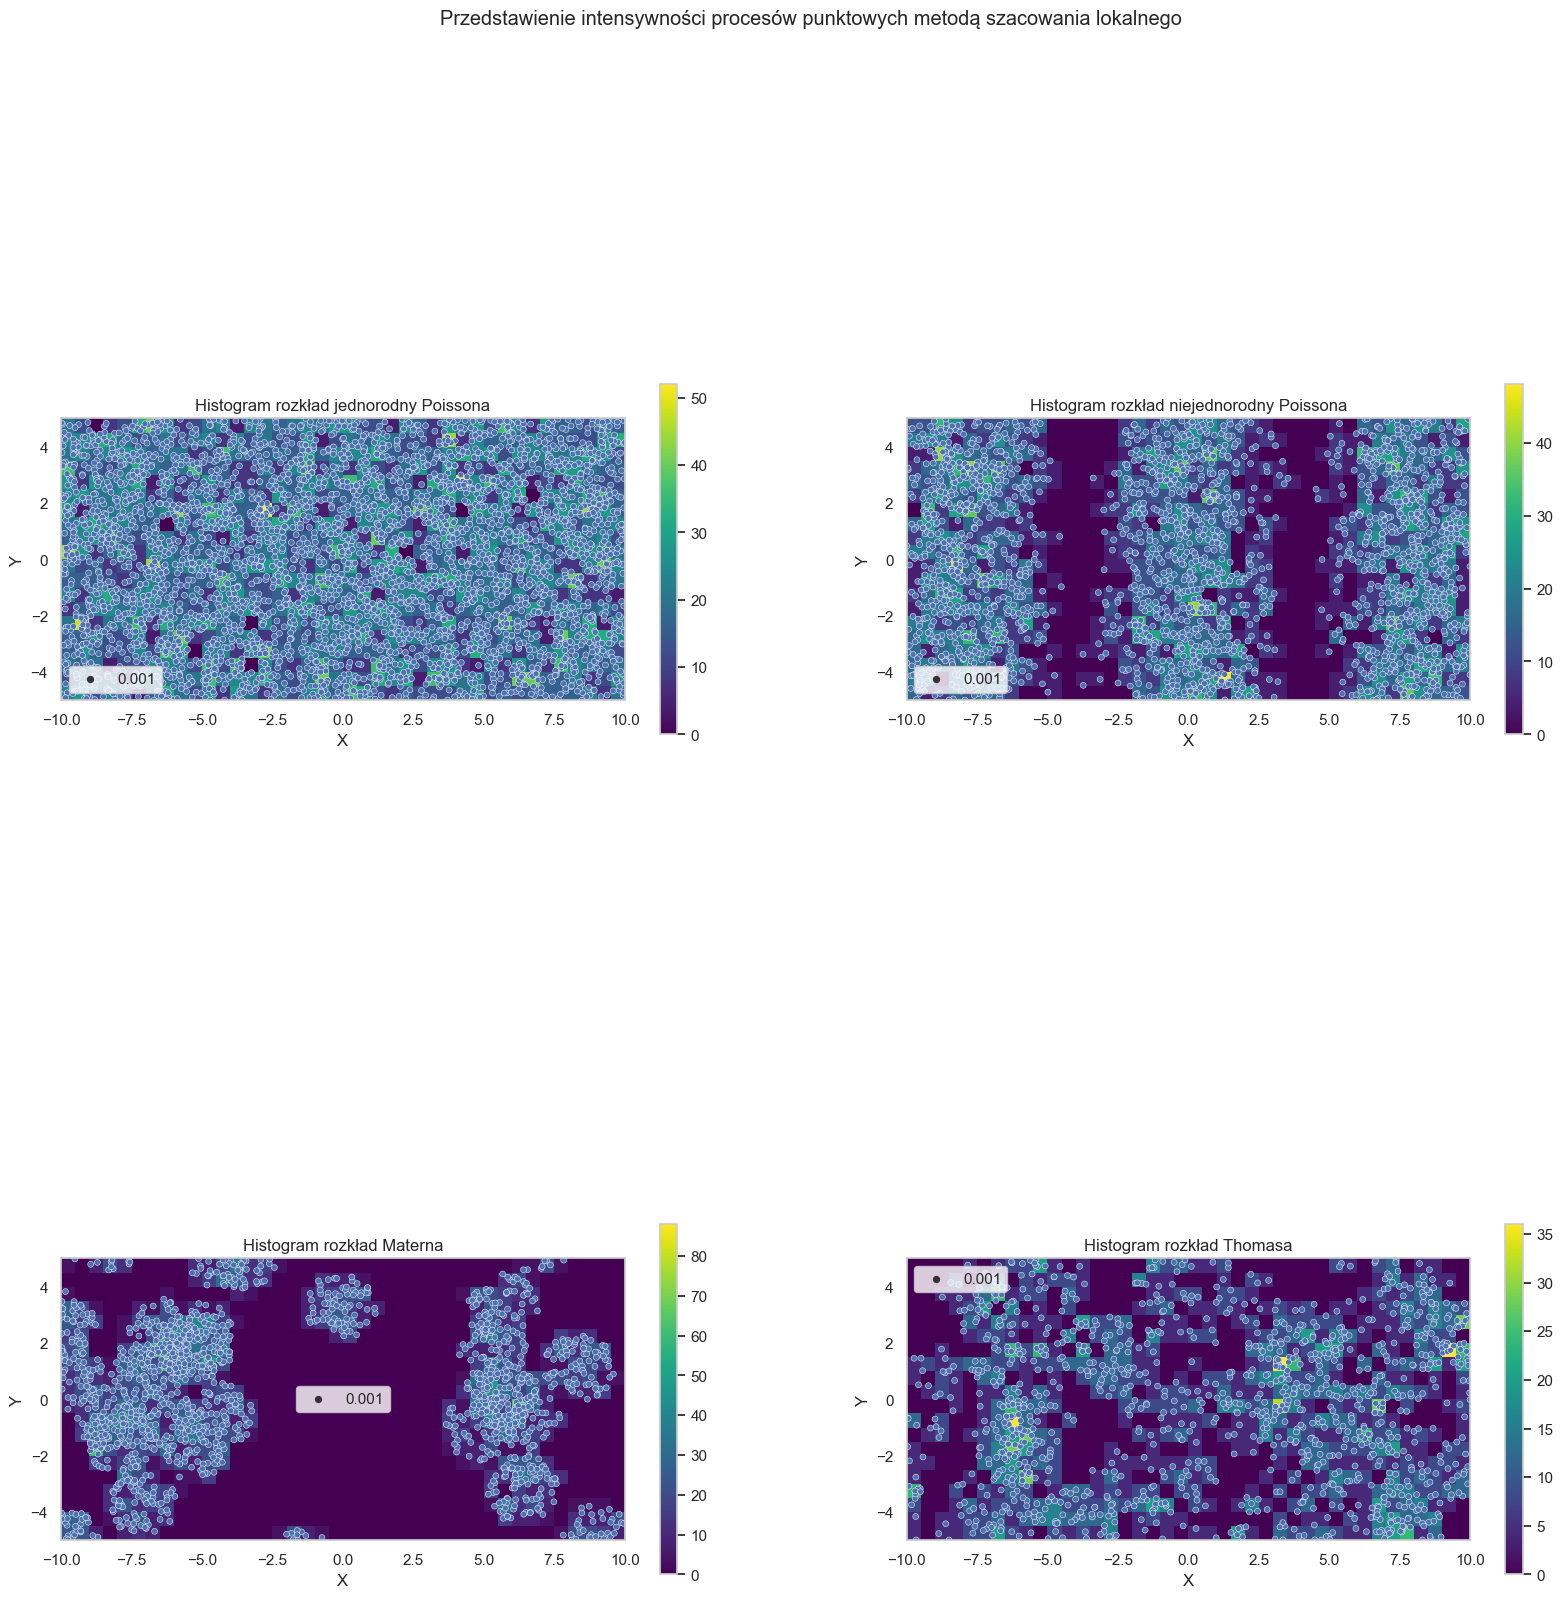

In [8]:
# YOUR CODE HERE
#raise NotImplementedError()
#sns.scatterplot(x='X',y='Y',data=JP)
figs,axes = plt.subplots(2,2, figsize=(20,20))
figs.suptitle('Przedstawienie intensywności procesów punktowych metodą szacowania lokalnego')
im=axes[0,0].pcolormesh(gen[0],gen[1],gen[2],cmap = 'viridis')
figs.colorbar(im, ax=axes[0,0],shrink=0.5)
axes[0,0].axis('scaled') #to jest funkcja axis ktora dobrze przeskaluje wykres
sns.scatterplot(x='X',y='Y',data=JP,size=0.001,ax=axes[0,0])
axes[0,0].title.set_text('Histogram rozkład jednorodny Poissona')

im=axes[0,1].pcolormesh(gen1[0],gen1[1],gen1[2],cmap = 'viridis')
figs.colorbar(im, ax=axes[0,1],shrink=0.5)
axes[0,1].axis('scaled') #to jest funkcja axis ktora dobrze przeskaluje wykres
sns.scatterplot(x='X',y='Y',data=NP,size=0.001,ax=axes[0,1])
axes[0,1].title.set_text('Histogram rozkład niejednorodny Poissona')

im=axes[1,0].pcolormesh(gen2[0],gen2[1],gen2[2],cmap = 'viridis')
figs.colorbar(im, ax=axes[1,0],shrink=0.5)
axes[1,0].axis('scaled') #to jest funkcja axis ktora dobrze przeskaluje wykres
sns.scatterplot(x='X',y='Y',data=M,size=0.001,ax=axes[1,0])
axes[1,0].title.set_text('Histogram rozkład Materna')

im=axes[1,1].pcolormesh(gen3[0],gen3[1],gen3[2],cmap = 'viridis')
figs.colorbar(im, ax=axes[1,1],shrink=0.5)
axes[1,1].axis('scaled') #to jest funkcja axis ktora dobrze przeskaluje wykres
sns.scatterplot(x='X',y='Y',data=T,size=0.001,ax=axes[1,1])
axes[1,1].title.set_text('Histogram rozkład Thomasa')

### Zadanie 2: Badanie intensywności procesu punktowego metodą funkcji jądrowych (25 pkt)

Przygotuj funkcję `intensity_on_kde()`, która będzie obliczać intensywność procesu punktowego z wykorzystaniem jądrowego estymatora funkcji intensywności danego wzorem:
$$ 	\grave{\lambda}(x,y) = \sum_{d_i < \tau} \frac{3}{\pi \tau^2} (1-\frac{d_i^2}{\tau^2})^2$$ 

gdzie: $d_i$ - odległość punktu od centrum funkcji jądrowej, $\tau$ - promień funkcji jądrowej.

Następnie wykorzystaj przygotowaną funkcje do zbadania intensywności wszystkich przygotowanych rozkładów punktów. Wykonaj obliczania dla promienia funkcji jądrowej równego 1.5 i siatki  200x100 regularnie rozłożonych i pokrywających cały obszar punktów.

Przedstaw wyniki analizy graficznie w postaci wykresów konturowych z wypełnieniem z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x2).

Uwaga! Funkcja przygotowana według powyższych wytycznych nie ma wbudowanego mechanizmu korekty na efekt brzegowy, w związu z czym będzie zaniżać wartość intensywności przy krawędziach analizowanego obszaru.

#### a) Przygotowanie funkcji

In [3]:
import math 
def intensity_on_kde(points, kernel_radius, grid, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    grid: list
        Lista określająca liczbę punktów w poziomie i pionie, dla których wyliczane będą wartości intensywności.
        Przykład: [10, 10]
    kernel_radius: float
        Liczba dodatnia określająca promień funkcji jądrowej.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: DataFrame
        Tablica zawierająca trzy kolumny - dwie ze współrzędnymi opisane jako "X" i "Y"
        oraz kolumnę z wartościami intensywności wyliczonymi dla tych współrzędnych opisaną jako "I".
    """
    # YOUR CODE HERE
    xc = np.linspace(x_lim[0],x_lim[1],grid[0])  
    yc = np.linspace(y_lim[0],y_lim[1],grid[1])  #punkty do generowania funkcji jądrowej to jeszcze nie jest kompletne
    
    xc1,yc1=np.meshgrid(xc,yc) # punkty srodkow
    d = {'x': np.concatenate(xc1), 'y': np.concatenate(yc1)}
    
    arr=np.linspace(0,0,grid[0]*grid[1]) #zmienna do przechowywania wartosci intensywnosci
    #print(len(d))
    #print(len(arr))
    #print(len(points))
    #print(arr)
    for i in range(0,grid[0]*grid[1]):#iterujemy po kazdym punkcjie funkcje jadrowa
        for k in range(0,len(points)): #tutaj będę iterował po elementach punktów z rozkładów
            if math.sqrt((d['x'][i]-points['X'][k])**2 + (d['y'][i]-points['Y'][k])**2)<kernel_radius: #tutaj co sie ztanie gdy warunke jest spełiony
                arr[i]=arr[i]+(3/(3.14*kernel_radius**2))*(1-((math.sqrt((d['x'][i]-points['X'][k])**2 + (d['y'][i]-points['Y'][k])**2))**2/(kernel_radius)**2))**2
    
                    
    #print(arr) #hmm prawie dobrze ale jeszcze nie do konca
    #raise NotImplementedError()
    #df=pd.DataFrame()
    #df['X']=xc
    #df['Y']=yc
    #return df #zwracam tablicę współrzędnych
    #d = {'x': np.concatenate(xc1), 'y': np.concatenate(yc1)} #tu mam wygenerowane punkty gdziw będę zaczepiał funkcje jądrową
    d = {'x': np.concatenate(xc1), 'y': np.concatenate(yc1), 'I': arr}
    df = pd.DataFrame(data=d) 
    return df
    

#### b) Wygenerowanie danych

In [4]:
# YOUR CODE HERE
#raise NotImplementedError()
dd=intensity_on_kde(JP,1.5,[200,100],[-10,10],[-5,5])
dd1=intensity_on_kde(NP,1.5,[200,100],[-10,10],[-5,5])
dd2=intensity_on_kde(M,1.5,[200,100],[-10,10],[-5,5])
dd3=intensity_on_kde(T,1.5,[200,100],[-10,10],[-5,5])
#print(dd)
#print(len(dd))


KeyboardInterrupt



#### c) Wizualizacja

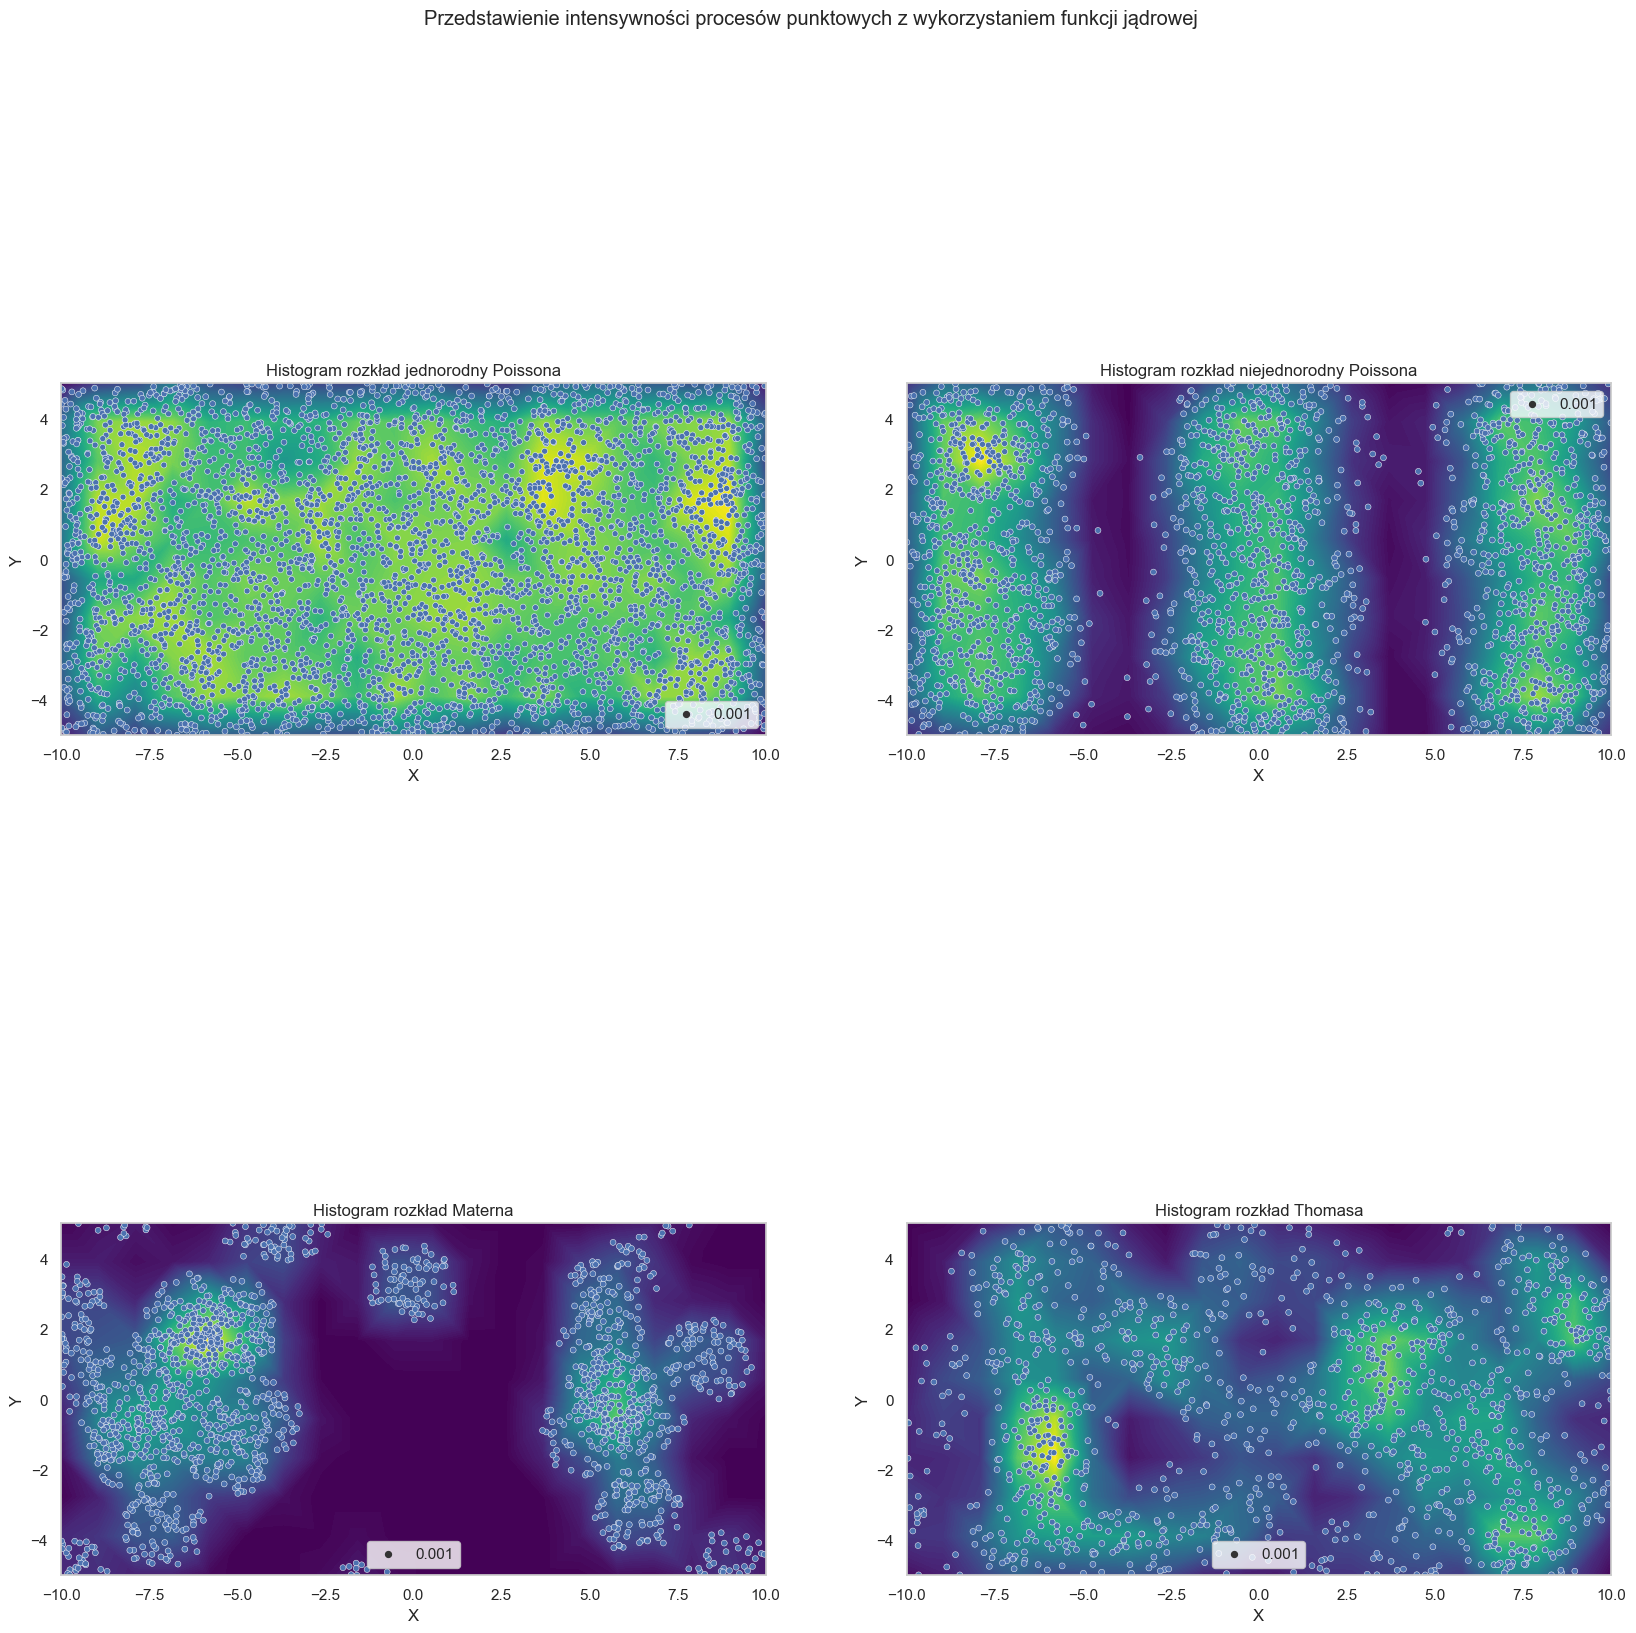

In [11]:
# YOUR CODE HERE
#raise NotImplementedError()
#ax1 = dd.plot.scatter(x='x', y='y')
#plt.tricontourf(dd['x'],dd['y'],dd['I'],cmap = 'viridis',levels=100)

figs,axes = plt.subplots(2,2, figsize=(20,20))
figs.suptitle('Przedstawienie intensywności procesów punktowych z wykorzystaniem funkcji jądrowej')
axes[0,0].tricontourf(dd['x'],dd['y'],dd['I'],cmap = 'viridis',levels=100)
axes[0,0].axis('scaled') #to jest funkcja axis ktora dobrze przeskaluje wykres
sns.scatterplot(x='X',y='Y',data=JP,size=0.001,ax=axes[0,0])
axes[0,0].title.set_text('Histogram rozkład jednorodny Poissona')

axes[0,1].tricontourf(dd1['x'],dd1['y'],dd1['I'],cmap = 'viridis',levels=100)
axes[0,1].axis('scaled') #to jest funkcja axis ktora dobrze przeskaluje wykres
sns.scatterplot(x='X',y='Y',data=NP,size=0.001,ax=axes[0,1])
axes[0,1].title.set_text('Histogram rozkład niejednorodny Poissona')

axes[1,0].tricontourf(dd2['x'],dd2['y'],dd2['I'],cmap = 'viridis',levels=100)
axes[1,0].axis('scaled') #to jest funkcja axis ktora dobrze przeskaluje wykres
sns.scatterplot(x='X',y='Y',data=M,size=0.001,ax=axes[1,0])
axes[1,0].title.set_text('Histogram rozkład Materna')

axes[1,1].tricontourf(dd3['x'],dd3['y'],dd3['I'],cmap = 'viridis',levels=100)
axes[1,1].axis('scaled') #to jest funkcja axis ktora dobrze przeskaluje wykres
sns.scatterplot(x='X',y='Y',data=T,size=0.001,ax=axes[1,1])
axes[1,1].title.set_text('Histogram rozkład Thomasa')